In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('iris.csv')
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df=df.apply(le.fit_transform)

In [4]:
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,8,14,4,1,0
1,6,9,4,1,0
2,4,11,3,1,0
3,3,10,5,1,0
4,7,15,4,1,0


In [5]:
X=df.iloc[:].values
X[:5]

array([[ 8, 14,  4,  1,  0],
       [ 6,  9,  4,  1,  0],
       [ 4, 11,  3,  1,  0],
       [ 3, 10,  5,  1,  0],
       [ 7, 15,  4,  1,  0]], dtype=int64)

In [6]:
import random
import numpy as np

class KMeans1:
    def __init__(self,n_cluster=3,max_iter=100):
        self.n_cluster=n_cluster
        self.max_iter=max_iter
        self.centroid=None
        
    def fit_predict(self,X):
        random_index=random.sample(range(0,X.shape[0]),self.n_cluster)
        self.centroid=X[random_index]
        
        for i in range(self.max_iter):
            cluster_group=self.assign_cluster(X)
            old_centroid=self.centroid
            
            self.centroid=self.move_centroid(X,cluster_group)
            
            if(old_centroid==self.centroid).all():
                break
        return cluster_group   
           
    def assign_cluster(self,X):
        cluster_group=[]
        distances=[]
        
        for row in X:
            for centroid in self.centroid:
                distances.append(np.sqrt(np.dot(row-centroid,row-centroid)))
            min_distance=min(distances)
            index_pos=distances.index(min_distance)
            cluster_group.append(index_pos)
            distances.clear()
        return np.array(cluster_group)
           
    def move_centroid(self,X,cluster_group):
        new_centroid=[]
        cluster_type=np.unique(cluster_group)
        for type in cluster_type:
            new_centroid.append(X[type==cluster_group].mean(axis=0))
        return np.array(new_centroid)



In [7]:
km=KMeans1(n_cluster=3,max_iter=1000)
y_means=km.fit_predict(X)

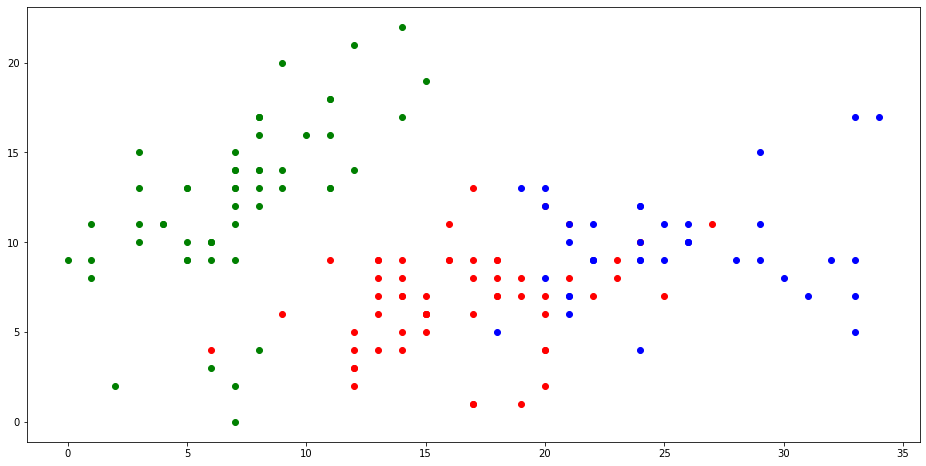

In [8]:
plt.figure(figsize=(16,8))
plt.scatter(X[y_means==0,0],X[y_means==0,1],c='red')
plt.scatter(X[y_means==1,0],X[y_means==1,1],c='Blue')
plt.scatter(X[y_means==2,0],X[y_means==2,1],c='green')
plt.show()

In [18]:
from sklearn.cluster import KMeans
def elbow_method(X):
    wcss = []
    for i in range(2, 11):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    plt.plot(range(2, 11), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.show()

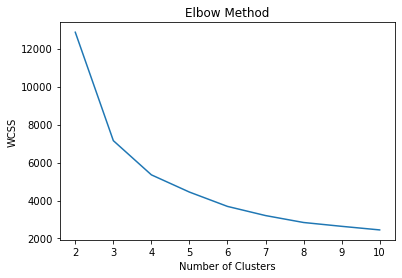

In [19]:
elbow_method(df)